In [1]:
from google.colab import drive
#drive.flush_and_unmount()
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [57]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns; sns.set(style="ticks", color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.feature_selection import RFE
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import os
from sklearn import metrics
!pip install pmdarima
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
os.chdir("/content/gdrive/Shared drives/Marketing Project")

In [0]:
 dataset = pd.read_csv("train.csv", names=['Store','Dept','Date','weeklySales','isHoliday'],sep=',', header=0)
 features = pd.read_csv("features.csv",sep=',', header=0,
                        names=['Store','Date','Temperature','Fuel_Price','MarkDown1','MarkDown2','MarkDown3','MarkDown4',
                               'MarkDown5','CPI','Unemployment','IsHoliday']).drop(columns=['IsHoliday'])
 stores = pd.read_csv("stores.csv", names=['Store','Type','Size'],sep=',', header=0)
 dataset = dataset.merge(stores, how='left').merge(features, how='left')


In [105]:
print(dataset.shape)
dataset.columns

(421570, 16)


Index(['Store', 'Dept', 'Date', 'weeklySales', 'isHoliday', 'Type', 'Size',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment'],
      dtype='object')

In [60]:
dataset.isnull().sum()

Store                0
Dept                 0
Date                 0
weeklySales          0
isHoliday            0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
dtype: int64

## EDA - Statistics

In [61]:
dataset.describe().transpose()[["mean","std"]]

,mean,std
Store,22.200546,12.785297
Dept,44.260317,30.492054
weeklySales,15981.258123,22711.183519
Size,136727.915739,60980.583328
Temperature,60.090059,18.447931
Fuel_Price,3.361027,0.458515
MarkDown1,7246.420196,8291.221345
MarkDown2,3334.628621,9475.357325
MarkDown3,1439.421384,9623.078290
MarkDown4,3383.168256,6292.384031


In [62]:
corr=dataset[["weeklySales","Size","Temperature","Fuel_Price","CPI","Unemployment"]].corr()
corr.style.background_gradient(cmap='coolwarm')
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,weeklySales,Size,Temperature,Fuel_Price,CPI,Unemployment
weeklySales,1.00,0.24,-0.00,-0.00,-0.02,-0.03
Size,0.24,1.00,-0.06,0.00,-0.00,-0.07
Temperature,-0.00,-0.06,1.00,0.14,0.18,0.10
Fuel_Price,-0.00,0.00,0.14,1.00,-0.16,-0.03
CPI,-0.02,-0.00,0.18,-0.16,1.00,-0.30
Unemployment,-0.03,-0.07,0.10,-0.03,-0.30,1.00


#Data Preprocessing

In [0]:
dataset=dataset.fillna(0)

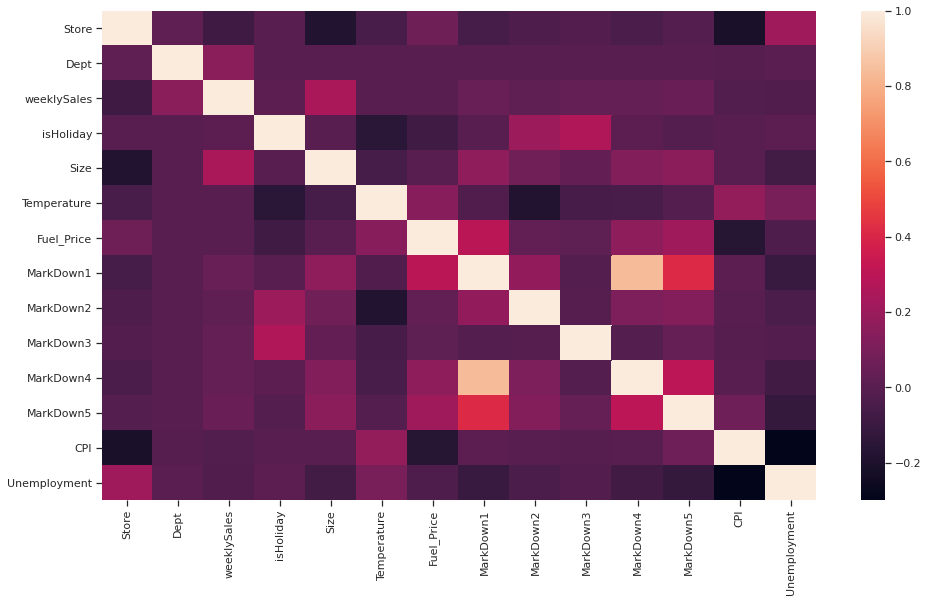

In [64]:
plt.figure(figsize=(16, 9)) 
corr_matrix = dataset.corr()
sns.heatmap(corr_matrix)
plt.show()

In [65]:
corr_with_cancel = corr_matrix["weeklySales"]
corr_with_cancel.abs().sort_values(ascending=False)[1:]

Size            0.243828
Dept            0.148032
Store           0.085195
MarkDown5       0.050465
MarkDown1       0.047172
MarkDown3       0.038562
MarkDown4       0.037467
Unemployment    0.025864
CPI             0.020921
MarkDown2       0.020716
isHoliday       0.012774
Temperature     0.002312
Fuel_Price      0.000120
Name: weeklySales, dtype: float64

In [0]:
dataset = pd.get_dummies(dataset,dtype='int64')

# Split into X and Y

In [0]:
y=dataset['weeklySales']
X=dataset.drop("weeklySales",axis=1)

# Train-Test Split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

# Models

#### Linear Regression

In [71]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_pred = regressor.predict(X_test)

In [0]:
#Dataframe with Actual and Predicted values from test set
linear_pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [0]:
linear_pred_df.sort_index(inplace=True)

In [0]:
#linear_pred_df

In [0]:
linear_pred_df1 = linear_pred_df.head(100)

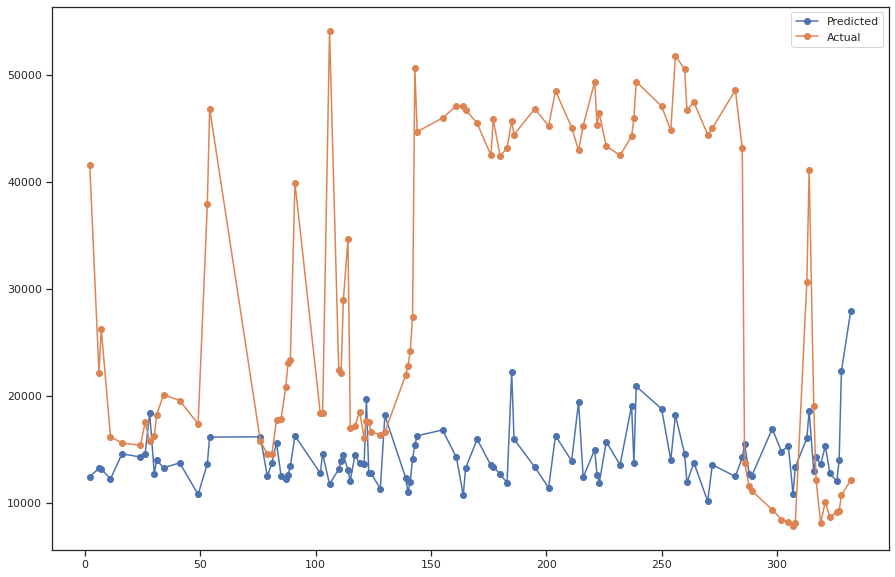

In [77]:
plt.figure(figsize=(15,10))
plt.plot(linear_pred_df1.index.values, linear_pred_df1['Predicted'], '-o', label='Predicted')
plt.plot(linear_pred_df1.index.values, linear_pred_df1['Actual'], '-o', label='Actual')
leg = plt.legend()
plt.show()

In [78]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
linear_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

Mean Absolute Error: 14601.11115015654
Mean Squared Error: 472878867.96367925
Root Mean Squared Error: 21745.778164132902


#### Random Forest

In [79]:
regressor = RandomForestRegressor(n_estimators=10, random_state=0)
regressor.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [0]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [0]:
#Dataframe with Actual and Predicted values from test set
random_pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [0]:
random_pred_df.sort_index(inplace=True)

In [0]:
#random_pred_df

In [0]:
random_pred_df1 = random_pred_df.head(100)

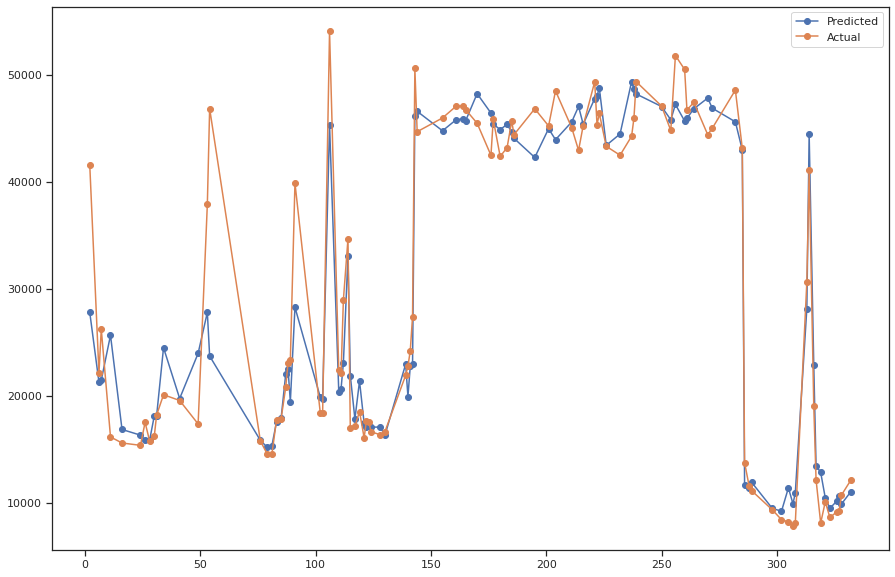

In [85]:
plt.figure(figsize=(15,10))
plt.plot(random_pred_df1.index.values, random_pred_df1['Predicted'], '-o', label='Predicted')
plt.plot(random_pred_df1.index.values, random_pred_df1['Actual'], '-o', label='Actual')
leg = plt.legend()
plt.show()

In [86]:
# Evaluating the Algorithm

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
random_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

Mean Absolute Error: 1784.0899303476683
Mean Squared Error: 22463087.769608002
Root Mean Squared Error: 4739.52400242978


#### Random Forest Tuning

In [87]:
rf_parameters = {"n_estimators": [10],#,100,500],
                 "min_samples_split": [2,3,4,5]}
                 
rf_model = RandomForestRegressor()
rf_cv_model = GridSearchCV(rf_model,
                           rf_parameters,
                           cv = 3)
rf_cv_model.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [88]:
print('Best parameters: ' + str(rf_cv_model.best_params_))

Best parameters: {'min_samples_split': 4, 'n_estimators': 10}


In [89]:
rf_tuned = RandomForestRegressor(min_samples_split = 5,
                                  n_estimators = 10)

rf_tuned.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [0]:
# Predicting the Test set results
y_pred = rf_tuned.predict(X_test)

In [0]:
#Dataframe with Actual and Predicted values from test set
rf_tuned_pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [0]:
rf_tuned_pred_df.sort_index(inplace=True)

In [0]:
rf_tuned_pred_df1 = rf_tuned_pred_df.head(100)

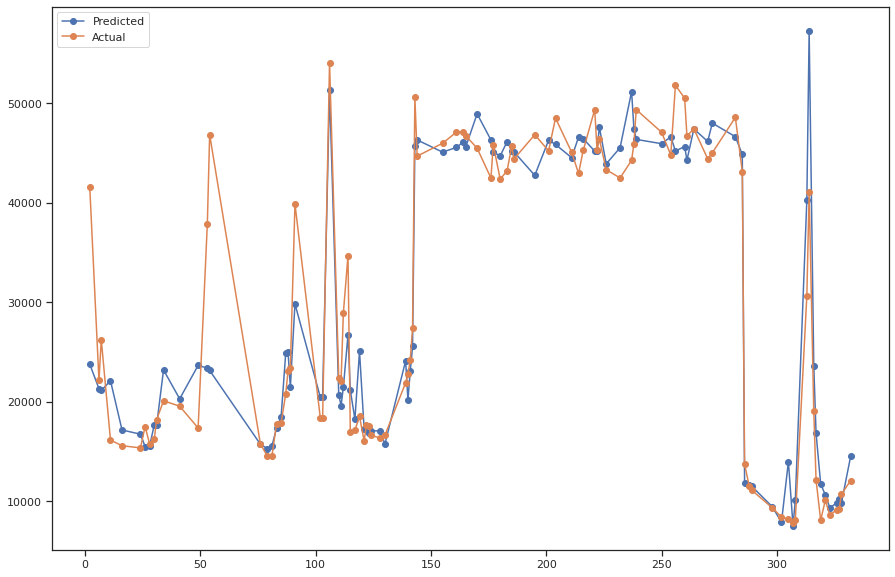

In [94]:
plt.figure(figsize=(15,10))
plt.plot(rf_tuned_pred_df1.index.values, rf_tuned_pred_df1['Predicted'], '-o', label='Predicted')
plt.plot(rf_tuned_pred_df1.index.values, rf_tuned_pred_df1['Actual'], '-o', label='Actual')
leg = plt.legend()
plt.show()

In [95]:
# Evaluating the Algorithm

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
rf_tuned_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

Mean Absolute Error: 1776.7273088339023
Mean Squared Error: 21736984.76689253
Root Mean Squared Error: 4662.293938276794


### Decision Trees

In [0]:
dTree = DecisionTreeRegressor(random_state=42)
dTree.fit(X_train,y_train)
y_predDT = dTree.predict(X_test)

In [97]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predDT))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predDT))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predDT)))
dt_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_predDT))
accuracy = dTree.score(X_test,y_test)

Mean Absolute Error: 2129.770908666809
Mean Squared Error: 30896405.173521064
Root Mean Squared Error: 5558.453487573775


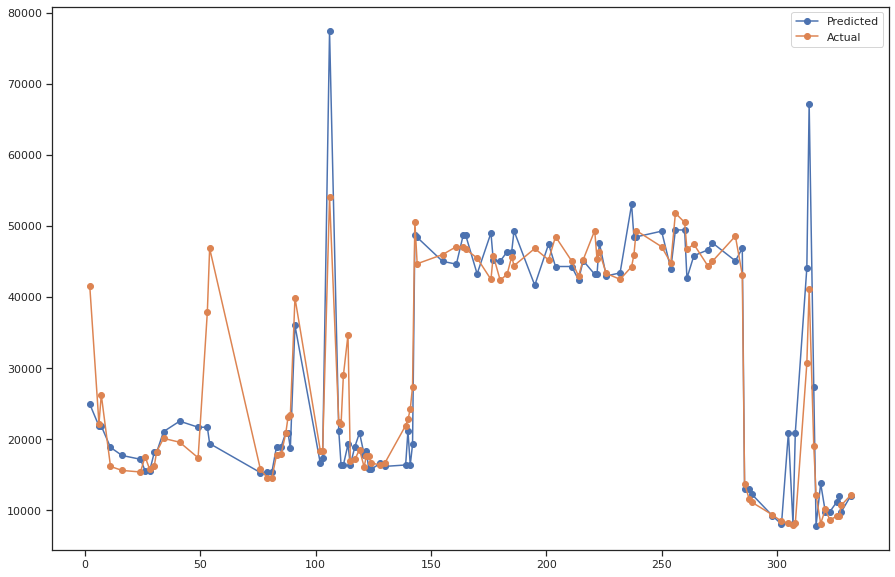

In [98]:
DT_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predDT})
DT_df.sort_index(inplace=True)
DT_df = DT_df.head(100)
plt.figure(figsize=(15,10))
plt.plot(DT_df.index.values, DT_df['Predicted'], '-o', label='Predicted')
plt.plot(DT_df.index.values, DT_df['Actual'], '-o', label='Actual')
leg = plt.legend()
plt.show()

### XGB

In [0]:
xgb_clf = XGBRegressor(objective='reg:squarederror', random_state = 42, n_estimators= 100, max_depth= 6, learning_rate= 0.8) 
xb = xgb_clf.fit(X_train,y_train)
y_predXGM=xgb_clf.predict(X_test)

In [100]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predXGM))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predXGM))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predXGM)))
xgb_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_predXGM))

Mean Absolute Error: 2940.716383812574
Mean Squared Error: 28316892.32809916
Root Mean Squared Error: 5321.361886594367


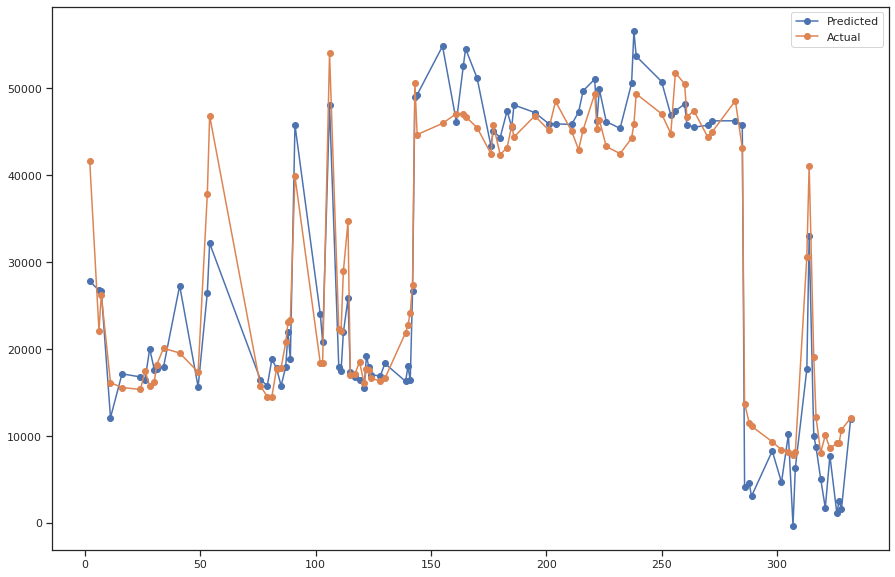

In [101]:
XGB_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predXGM})
XGB_df.sort_index(inplace=True)
XGB_df = XGB_df.head(100)
plt.figure(figsize=(15,10))
plt.plot(XGB_df.index.values, XGB_df['Predicted'], '-o', label='Predicted')
plt.plot(XGB_df.index.values, XGB_df['Actual'], '-o', label='Actual')
leg = plt.legend()
plt.show()

## Long Short-Term Memory Model - Time Series Forecasting

---



In [0]:
import numpy as np
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Bidirectional
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import random 
random.seed(134)
Walmart_locations=dataset[["Store","Dept"]].drop_duplicates().reset_index().drop(columns="index").reset_index().rename(columns={"index": "Locations"})
def store(s):
    return "Location" + str(s)

Walmart_StoreDept=dataset.merge(Walmart_locations,left_on=["Store","Dept"],right_on=["Store","Dept"]).drop(columns=["Store","Dept"])
Walmart_StoreDept["Locations"]=Walmart_StoreDept["Locations"].apply(store)


Walmart_Pivot = pd.pivot_table(Walmart_StoreDept, values='weeklySales', index=['Date'],columns=['Locations'], aggfunc=np.sum).fillna(0)

# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

# define input sequence
dataset=array(Walmart_Pivot)
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# choose a number of time steps
n_steps = 3
# convert into input/output
trainX, trainy = split_sequences(train, n_steps)
testX, testy = split_sequences(test, n_steps)
# the dataset knows the number of features, e.g. 2
n_features = trainX.shape[2]
# define model
model = Sequential()
#model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(Bidirectional(LSTM(100, activation='relu'), input_shape=(n_steps, n_features)))
model.add(Dense(n_features))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(trainX, trainy, epochs=500, verbose=0)
# demonstrate prediction
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [109]:
print('Mean Absolute Deviation (MAD) of LSTM: ', mean_absolute_error(testy, testPredict))
print('Mean Squared Error (MSE) of LSTM: ', mean_squared_error(testy, testPredict))
print('Root Mean Squared Error (RMSE) of LSTM: ', np.sqrt(mean_squared_error(testy, testPredict)))
lstm_rmse = np.sqrt(mean_squared_error(testy, testPredict))

Mean Absolute Deviation (MAD) of LSTM:  2149.7185432943866
Mean Squared Error (MSE) of LSTM:  19648481.803162277
Root Mean Squared Error (RMSE) of LSTM:  4432.660803982443


# Comparing Models

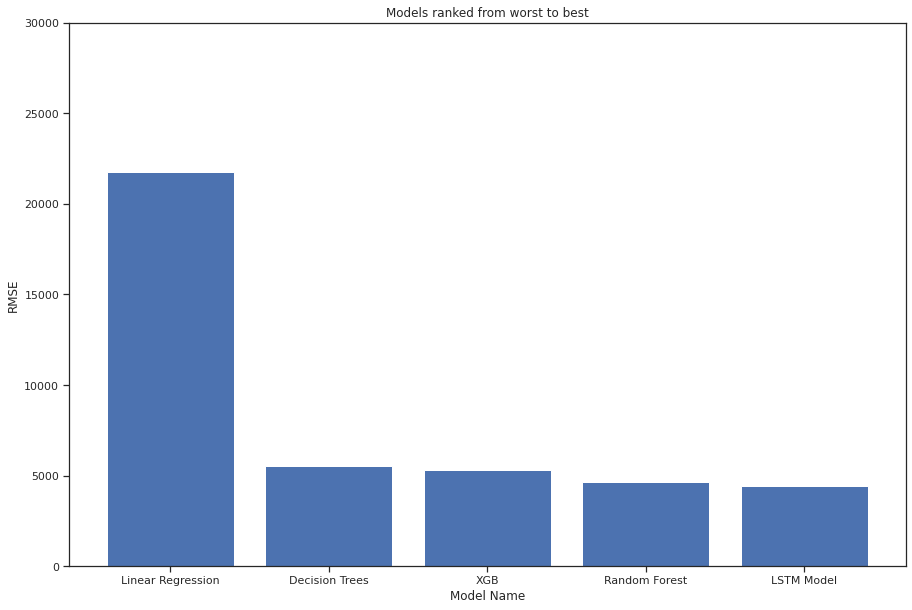

In [110]:
plt.figure(figsize=(15,10))
#data for bar chart
height = [linear_rmse,dt_rmse,xgb_rmse, rf_tuned_rmse,lstm_rmse]
bars = ('Linear Regression', 'Decision Trees','XGB','Random Forest', "LSTM Model"  )
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height)
 
# Add title and axis names
plt.title('Models ranked from worst to best')
plt.xlabel('Model Name')
plt.ylabel('RMSE')
 
# Limits for the Y axis
plt.ylim(0,30000)
 
# Create names
plt.xticks(y_pos, bars)
 
# Show graphic
plt.show()